In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from tsa import config, plots
from tsa.config import PROCESSED_DATA_DIR

2026-01-28 16:53:03.171 | INFO     | tsa.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/5_HS25_Programming/tsa


## ZWEX - quarterly

In [2]:
df_zwex = pd.read_csv(config.EXTERNAL_DATA_DIR / "zwex.csv")

df_zwex["Quartal"] = pd.PeriodIndex(df_zwex["Quartal"], freq="Q").to_timestamp()
df_zwex.drop(columns=["See", "Land", "Regio"], inplace=True)
df_zwex = df_zwex.set_index("Quartal")
df_zwex_qs = df_zwex.resample("QS").asfreq()
df_zwex_qs.sort_index(inplace=True)
print(df_zwex.index.min())
print(df_zwex.index.max())
df_zwex.tail()

1980-01-01 00:00:00
2025-07-01 00:00:00


,ZWEX
Quartal,
1981-01-01,57.11
1980-10-01,55.15
1980-07-01,50.82
1980-04-01,50.04
1980-01-01,51.29


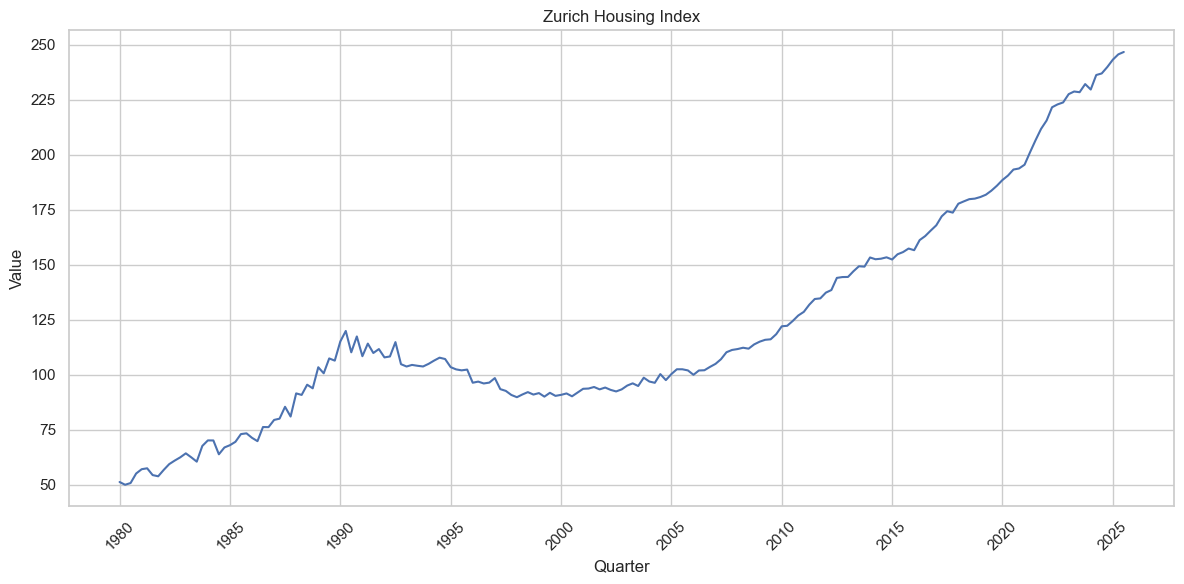

In [3]:
plots.sns_lineplot(
    "Zurich Housing Index", "Quartal", "Quarter", "ZWEX", "Value", df_zwex
)

## Swiss Gov Bonds 10Y yield (risk free) - monthly

In [4]:
df_rf = pd.read_csv(
    config.EXTERNAL_DATA_DIR / "IRLTLT01CHM156N.csv",
    parse_dates=["observation_date"],
    date_format="%Y-%m-%d",
    index_col="observation_date",
)
print(df_rf.index.min())
print(df_rf.index.max())
df_rf_q = df_rf.resample("QS").asfreq()
df_rf_q = df_rf_q.interpolate(method="cubic")
df_rf_q.sort_index(inplace=True, ascending=False)
df_rf_q.tail()

1955-01-01 00:00:00
2025-11-01 00:00:00


,IRLTLT01CHM156N
observation_date,
1956-01-01,2.94
1955-10-01,3.17
1955-07-01,3.04
1955-04-01,2.85
1955-01-01,2.70


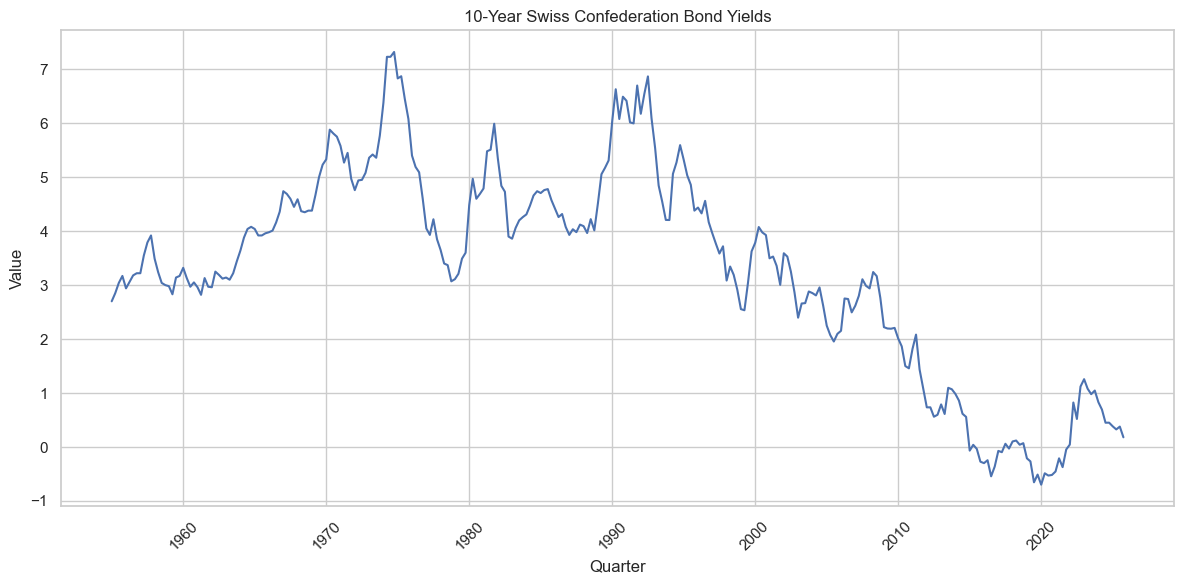

In [5]:
plots.sns_lineplot(
    "10-Year Swiss Confederation Bond Yields",
    "observation_date",
    "Quarter",
    "IRLTLT01CHM156N",
    "Value",
    df_rf_q,
)

## Swiss real GDP - yearly

In [6]:
df_gdp_and_growth = pd.read_csv(
    config.EXTERNAL_DATA_DIR / "snb-data-gdppr-en-selection-20260121_0900.csv",
    sep=";",
    skiprows=3,
)
df_gdp = df_gdp_and_growth[df_gdp_and_growth["D0"] == "WMF"].copy()
df_gdp["Date"] = pd.PeriodIndex(df_gdp["Date"], freq="Q").to_timestamp()
df_gdp = df_gdp.set_index("Date")[["Value"]].rename(columns={"Value": "GDP"})
df_gdp["GDP"] = pd.to_numeric(df_gdp["GDP"])
print(df_gdp.index.min())
print(df_gdp.index.max())
df_gdp_q = df_gdp.resample("QS").asfreq()
df_gdp_q.tail()

1980-07-01 00:00:00
2025-07-01 00:00:00


,GDP
Date,
2024-07-01,200356.973102
2024-10-01,200662.072736
2025-01-01,202116.576414
2025-04-01,202425.650388
2025-07-01,201346.317833


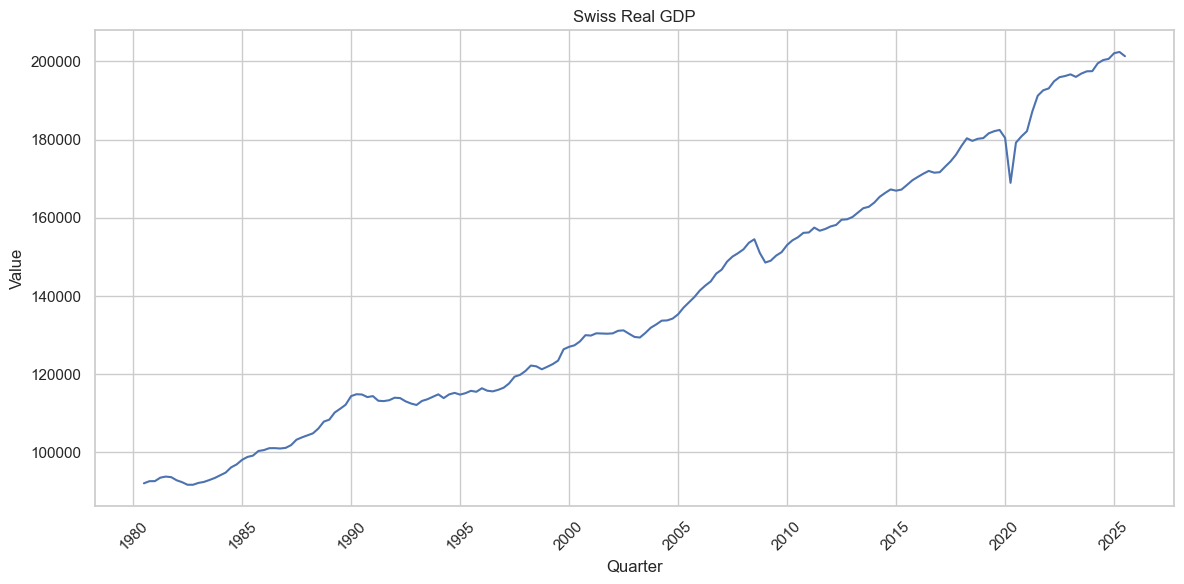

In [7]:
plots.sns_lineplot("Swiss Real GDP", "Date", "Quarter", "GDP", "Value", df_gdp_q)

In [8]:
df_gdp_growth = df_gdp_and_growth[df_gdp_and_growth["D0"] == "VVP"].copy()
df_gdp_growth["Date"] = pd.PeriodIndex(df_gdp_growth["Date"], freq="Q").to_timestamp()
df_gdp_growth = df_gdp_growth.set_index("Date")[["Value"]].rename(
    columns={"Value": "GDP_growth"}
)
df_gdp_growth["GDP_growth"] = pd.to_numeric(df_gdp_growth["GDP_growth"])
df_gdp_growth_q = df_gdp_growth.resample("QS").asfreq()
df_gdp_growth_q.tail()

,GDP_growth
Date,
2024-07-01,0.423085
2024-10-01,0.152278
2025-01-01,0.724852
2025-04-01,0.152919
2025-07-01,-0.533200


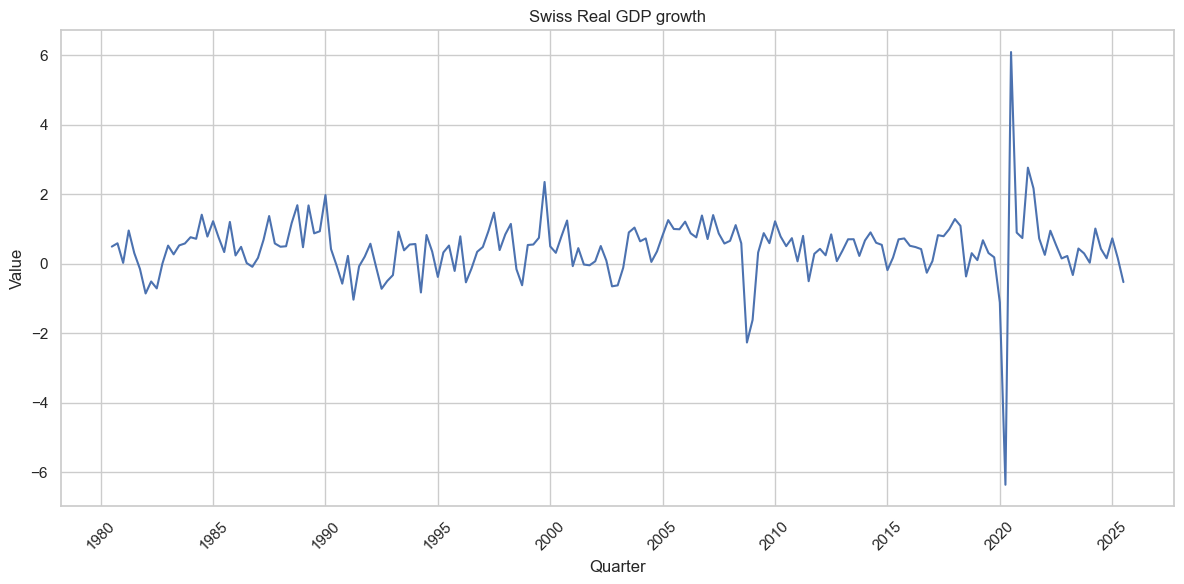

In [9]:
plots.sns_lineplot(
    "Swiss Real GDP growth", "Date", "Quarter", "GDP_growth", "Value", df_gdp_growth_q
)

## Swiss CPI - monthly

In [10]:
df_cpi = pd.read_csv(
    config.EXTERNAL_DATA_DIR / "CHECPIALLMINMEI.csv",
    parse_dates=["observation_date"],
    date_format="%Y-%m-%d",
    index_col="observation_date",
)
print(df_cpi.index.min())
print(df_cpi.index.max())
df_cpi_q = df_cpi.resample("QS").asfreq()
df_cpi_q = df_cpi_q.interpolate(method="cubic")

df_cpi_q.tail()

1955-01-01 00:00:00
2025-04-01 00:00:00


,CHECPIALLMINMEI
observation_date,
2024-04-01,107.6943
2024-07-01,107.7979
2024-10-01,107.3318
2025-01-01,107.0709
2025-04-01,107.7312


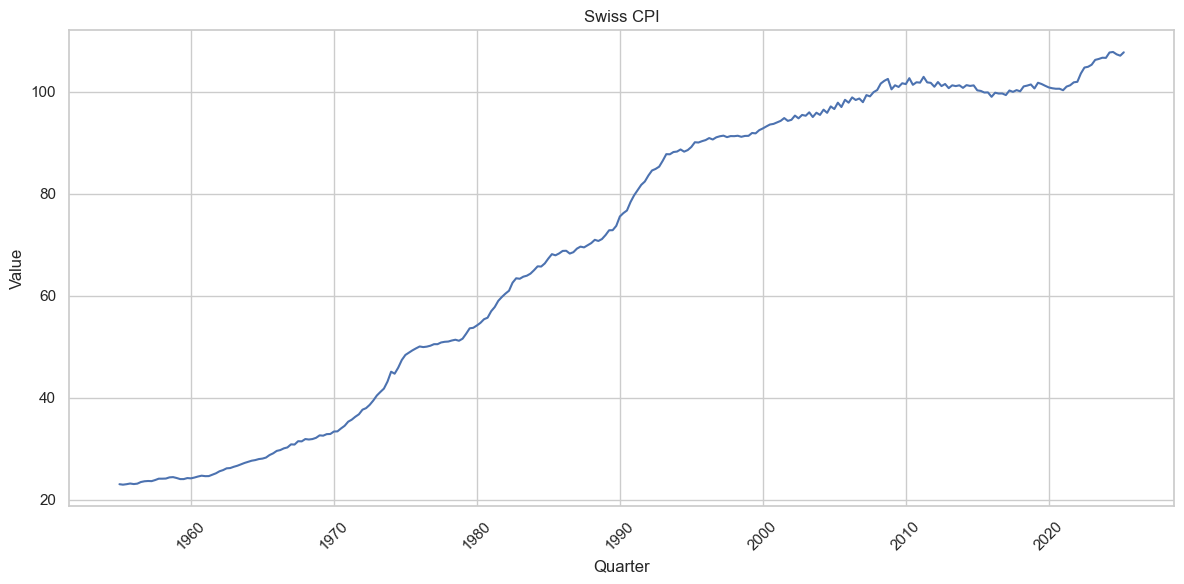

In [11]:
plots.sns_lineplot(
    "Swiss CPI", "observation_date", "Quarter", "CHECPIALLMINMEI", "Value", df_cpi_q
)

## Immigration to Zurich - monthly

In [12]:
df_immigration = pd.read_excel(
    config.EXTERNAL_DATA_DIR / "zuwanderung_zurich.xlsx",
    sheet_name="1993 – 2024",
    header=8,
)
month_map = {
    "Januar": 1,
    "Februar": 2,
    "März": 3,
    "April": 4,
    "Mai": 5,
    "Juni": 6,
    "Juli": 7,
    "August": 8,
    "September": 9,
    "Oktober": 10,
    "November": 11,
    "Dezember": 12,
}
df_immigration["Month_num"] = df_immigration["Monat"].map(month_map)
df_immigration["Date"] = pd.to_datetime(
    df_immigration["Jahr"].astype(str)
    + "-"
    + df_immigration["Month_num"].astype(str)
    + "-01"
)
df_immigration = df_immigration.set_index("Date")
# Net migration = Zuzüge - Wegzüge
df_immigration["net_migration"] = (
    df_immigration["Zuzüge von auswärts"] - df_immigration["Wegzüge nach auswärts"]
)
print(df_immigration.index.min())
print(df_immigration.index.max())
df_immigration_q = (
    df_immigration[["net_migration", "Bestand am Monatsende"]].resample("QS").sum()
)
df_immigration_q.rename(columns={"Bestand am Monatsende": "population"}, inplace=True)
# For population, we take the last month of each quarter instead of sum
df_immigration_q["population"] = (
    df_immigration["Bestand am Monatsende"].resample("QS").last()
)
df_immigration_q.tail()

1993-01-01 00:00:00
2024-12-01 00:00:00


,net_migration,population
Date,,
2023-10-01,391,447082
2024-01-01,-591,446862
2024-04-01,-275,447076
2024-07-01,1437,448818
2024-10-01,-271,448664


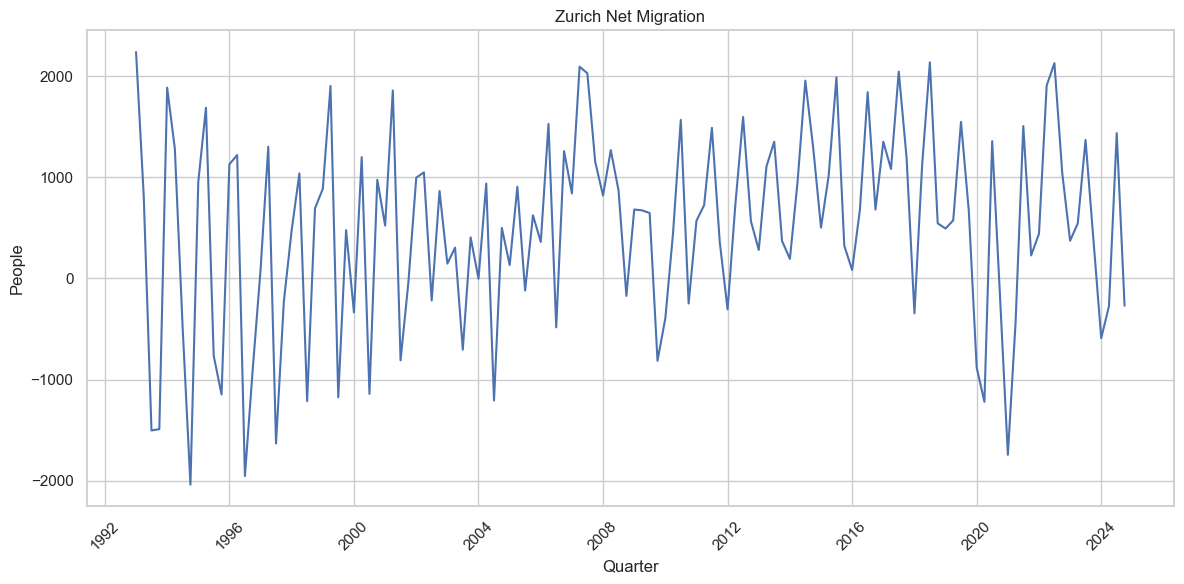

In [13]:
plots.sns_lineplot(
    "Zurich Net Migration",
    "Date",
    "Quarter",
    "net_migration",
    "People",
    df_immigration_q,
)

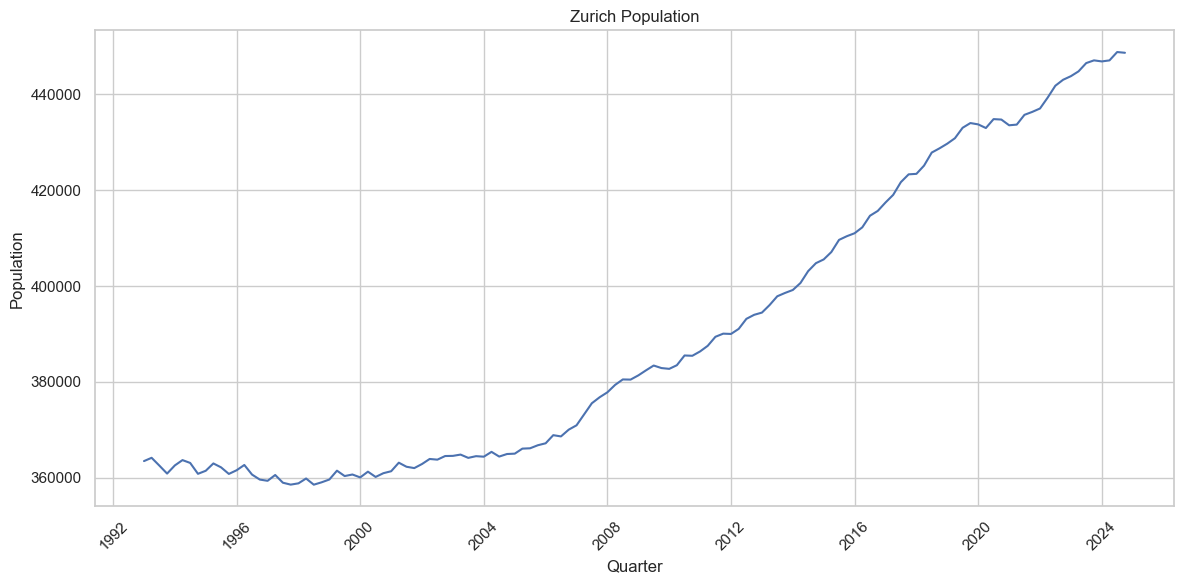

In [14]:
plots.sns_lineplot(
    "Zurich Population",
    "Date",
    "Quarter",
    "population",
    "Population",
    df_immigration_q,
)

## Vacancy Rates in Zurich

In [15]:
df_vacancy = pd.read_csv(
    config.EXTERNAL_DATA_DIR / "gpzuerich" / "data_3465529.csv",
    sep=";",
)
# Filter for Zurich city (BFS_NR=261)
df_vacancy = df_vacancy[df_vacancy["BFS_NR"] == 261][
    ["INDIKATOR_JAHR", "INDIKATOR_VALUE"]
].copy()
df_vacancy.rename(
    columns={"INDIKATOR_JAHR": "Date", "INDIKATOR_VALUE": "vacancy_rate"}, inplace=True
)
df_vacancy["Date"] = pd.to_datetime(df_vacancy["Date"], format="%Y")
df_vacancy = df_vacancy.set_index("Date")
print(df_vacancy.index.min())
print(df_vacancy.index.max())
df_vacancy_q = df_vacancy.resample("QS").ffill()
df_vacancy_q.tail()

1984-01-01 00:00:00
2025-01-01 00:00:00


,vacancy_rate
Date,
2024-01-01,0.07
2024-04-01,0.07
2024-07-01,0.07
2024-10-01,0.07
2025-01-01,0.10


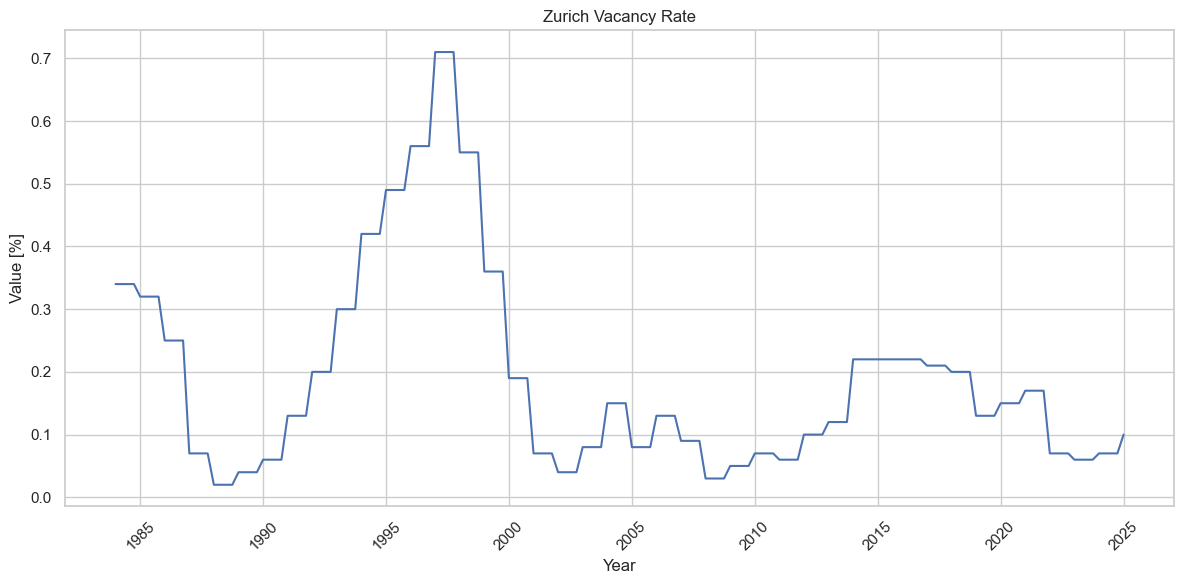

In [16]:
plots.sns_lineplot(
    "Zurich Vacancy Rate", "Date", "Year", "vacancy_rate", "Value [%]", df_vacancy_q
)

## Swiss Residential Property Price Index by Swiss National Bank (quarterly)

In [17]:
df_impi = pd.read_csv(
    config.EXTERNAL_DATA_DIR / "snb-data-plimoinchq-en-all-20260121_0900.csv",
    sep=";",
    skiprows=3,
)

df_impi["Date"] = pd.PeriodIndex(df_impi["Date"], freq="Q").to_timestamp()
df_impi = df_impi[(df_impi["D0"].isin(["EW", "EH"])) & (df_impi["D1"] == "AP")].copy()
df_impi = (
    df_impi.pivot_table(
        index="Date",
        columns="D0",
        values="Value",
    )
    .mean(axis=1)
    .rename("IMPI")
    .reset_index()
    .set_index("Date")
)
df_impi.head()

,IMPI
Date,
1970-01-01,36.811458
1970-04-01,36.578237
1970-07-01,37.754470
1970-10-01,37.741615
1971-01-01,40.380038


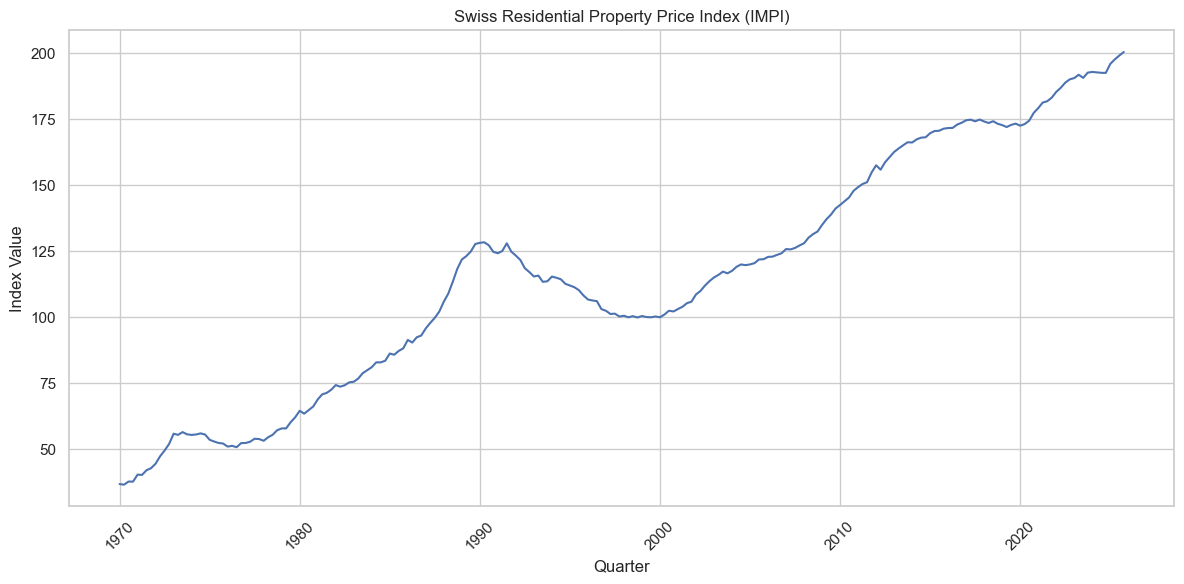

In [18]:
plots.sns_lineplot(
    "Swiss Residential Property Price Index (IMPI)",
    "Date",
    "Quarter",
    "IMPI",
    "Index Value",
    df_impi,
)

## Combine datasets

In [19]:
df_combined = pd.concat(
    [
        df_zwex,
        df_impi,
        df_gdp_q,
        df_gdp_growth_q,
        df_cpi_q,
        df_rf_q,
        df_immigration_q,
        df_vacancy_q,
    ],
    axis=1,
)
df_combined.dropna(inplace=True)
df_combined.head()

,ZWEX,IMPI,GDP,GDP_growth,CHECPIALLMINMEI,IRLTLT01CHM156N,net_migration,population,vacancy_rate
1993-01-01,103.77,115.447844,112130.448638,-0.332376,86.47165,5.539,2238.0,363504.0,0.30
1993-04-01,104.49,115.783942,113159.227131,0.917484,87.75593,4.845,816.0,364188.0,0.30
1993-07-01,104.10,113.425045,113590.721726,0.381316,87.73057,4.546,-1504.0,362572.0,0.30
1993-10-01,103.78,113.624620,114212.328316,0.547234,88.17464,4.208,-1491.0,360898.0,0.30
1994-01-01,104.98,115.409362,114854.744384,0.562475,88.26907,4.206,1886.0,362604.0,0.42


In [20]:
print(df_combined.index.min())
print(df_combined.index.max())

1993-01-01 00:00:00
2024-10-01 00:00:00


In [21]:
df_combined.to_csv(config.INTERIM_DATA_DIR / "combined.csv")

Text(0.5, 1.0, 'Zurich vs National Housing Index Normalized')

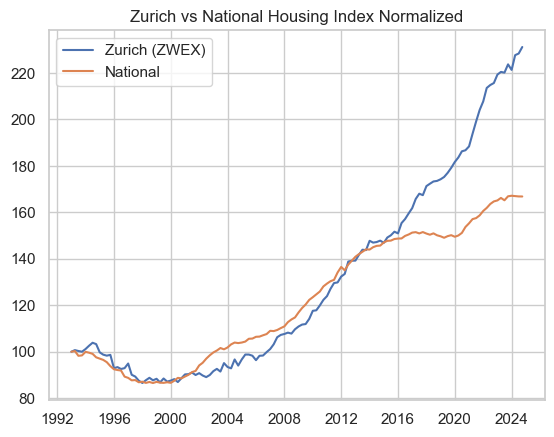

In [22]:
base_date = df_combined.index.min()
df_combined["ZWEX_norm"] = (
    df_combined["ZWEX"] / df_combined.loc[base_date, "ZWEX"] * 100
)
df_combined["IMPI_norm"] = (
    df_combined["IMPI"] / df_combined.loc[base_date, "IMPI"] * 100
)

fig, ax = plt.subplots()
ax.plot(df_combined.index, df_combined["ZWEX_norm"], label="Zurich (ZWEX)")
ax.plot(df_combined.index, df_combined["IMPI_norm"], label="National")
ax.legend()
ax.set_title("Zurich vs National Housing Index Normalized")

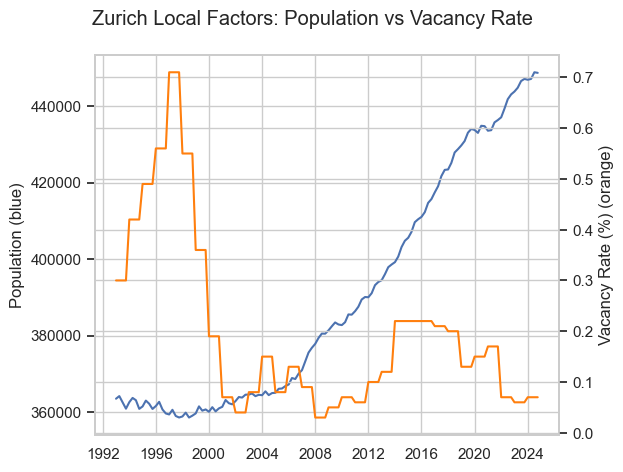

In [23]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Population (blue)")
ax1.plot(df_combined.index, df_combined["population"], label="Population")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.set_ylabel("Vacancy Rate (%) (orange)")
ax2.plot(
    df_combined.index,
    df_combined["vacancy_rate"],
    label="Vacancy Rate",
    color="tab:orange",
)
ax2.tick_params(axis="y")

fig.suptitle("Zurich Local Factors: Population vs Vacancy Rate")
fig.tight_layout()